In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os, warnings
from matplotlib import gridspec
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data = pd.read_excel('calcific_tendinopathy_ddbb.xlsx')

In [3]:
data.head(30)

,image,calcium,pat_id,type,localization
0,0072879_001.png,1,72879,2,supraespinoso
1,0072879_002.png,1,72879,2,supraespinoso
2,00326955M_001.png,1,326955M,3,supraespinoso
3,00326955M_002.png,1,326955M,3,supraespinoso
4,0094847_001.png,0,94847,-1,NaN
5,00486523M_001.png,1,486523M,2,infraespinoso
6,00486523M_002.png,1,486523M,2,infraespinoso
7,00564810_001.png,1,564810,1,supraespinoso
8,00564810_002.png,1,564810,1,supraespinoso
9,00782404_001.png,1,782404,1,supraespinoso


In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [6]:
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        'valid',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 14 images belonging to 2 classes.
Found 13 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [7]:
model = keras.Sequential([
    layers.InputLayer(input_shape=[150, 150,3]),
    
    # Block One
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Two
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.BatchNormalization(renorm=True),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.BatchNormalization(renorm=True),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])


In [8]:
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [12]:
batch_size = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data = validation_generator,
)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.4871 - binary_accuracy: 0.7143 - val_loss: 1.2020 - val_binary_accuracy: 0.6154
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 0.6026 - binary_accuracy: 0.7143 - val_loss: 0.8172 - val_binary_accuracy: 0.6154
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.5507 - binary_accuracy: 0.7143 - val_loss: 0.6984 - val_binary_accuracy: 0.6154
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.5868 - binary_accuracy: 0.7143 - val_loss: 0.7041 - val_binary_accuracy: 0.6154
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.6606 - binary_accuracy: 0.7143 - val_loss: 0.6927 - val_binary_accuracy: 0.6154
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.6712 - binary_accuracy: 0.7143 - val_loss: 0.6926 - val_binary_accuracy: 0.6154
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.6336 - binary_accuracy:

In [13]:
test_lost, test_acc = model.evaluate_generator(validation_generator)
print(test_acc)

0.6153846383094788


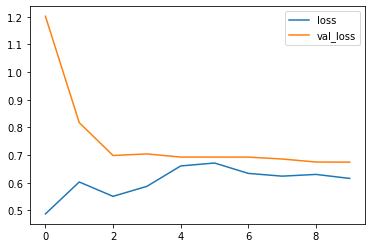

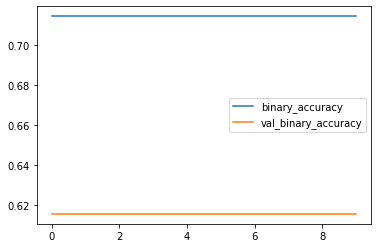

In [14]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();